In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 1) Solving the heat equation

Complete the ``step(...)`` function below, so that it computes a time step of the finite-difference heat equation solver: 


  \begin{align}
  U^{t+1}_{i,j}   = U^t_{i, j} + \Delta t \alpha \left (
   \frac{U^{t}_{i,j+1} - 2 U^t_{i, j} + U^t_{i,j-1}}{\Delta x^2}
   + \frac{U^{t}_{i+1,j} - 2 U^t_{i, j} + U^t_{i-1,j}}{\Delta y^2}
  \right )
  \end{align}

Use explicit loops to iterate over the elements in $U$. Assume a homogeneous grid size $\Delta x = \Delta y = 1.0$ and a time step of $0.1$.

In [2]:
def initial_state(size):
    """
    Return: numpy.ndarray containing the heat distribution at time t = 0.
    """
    u = np.zeros((size, size))
    n = int(0.05 * size)
    u[size // 4 : 3 * size // 4 + 1, size // 2 - n : size // 2 + n + 1] = 1.0
    u[size // 2 - n : size // 2 + n + 1, size // 4 : 3 * size // 4 + 1] = 1.0
    return u


In [3]:
def step(u):
    """
    Perform a solver step of the heat equation.
    
    Args:
        u: n x n numpy.ndarray containing the heat distribution at time t.
        
    Return:
        n x n numpy.ndarray containing the heat distribution at time t + 0.1.
    
    """
    n, _ = u.shape
    # Compute laplacian
    l = np.zeros((n, n))
    for i in range(1, n-1):
        for j in range(1, n-1):
            down = u[i - 1, j]
            up = u[i + 1, j]
            left = u[i, j - 1]
            right = u[i, j + 1]
            center = u[i, j]
            dudy2 = up + down - 2.0 * center
            dydx2 = left + right - 2.0 * center
            l[i, j] = dudy2 + dydx2

    # Propagate forward
    u_next = np.zeros((n ,n))
    for i in range(0, n):
        for j in range(0, n):
            u_next[i, j] = u[i, j] + 0.1 * l[i, j]

    return u_next 

In [4]:
def solve_heat_equation(size, n_steps):
    """
    Run heat equation solve for given number of steps.
    
    Args:
        size: Side-length of the domain.
        n_steps: The number of solver steps to perform.
        
    Return:
        Array containing the solution after n_steps time steps.
    """
    u = initial_state(size) 
    for i in range(n_steps):
        u = step(u)
    return u

In [5]:
%timeit u = solve_heat_equation(128, 100)

4.94 s ± 161 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
u = solve_heat_equation(128, 100)

Text(0.0, 1.0, '(b) $t = 10$')

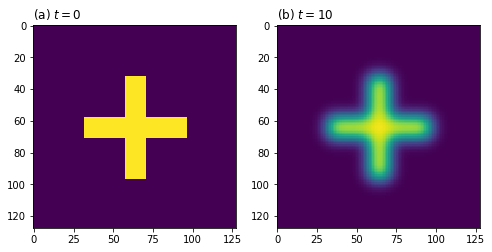

In [8]:
from matplotlib.colors import Normalize
u0 = initial_state(128)
f, axs = plt.subplots(1, 2, figsize=(8, 4))
norm = Normalize(0, 1)
axs[0].imshow(u0, norm=norm)
axs[0].set_title("(a) $t = 0$", loc="left")
axs[1].imshow(u, norm=norm)
axs[1].set_title("(b) $t = 10$", loc="left")

# 2) Using numpy to solve the heat equation

Complete the ``step_numpy`` function below so that is also computes a solver step for the heat equation, but use only numpy  array operations.

In [10]:
def step_numpy(u):
    """
    Perform a solver step of the heat equation.
    
    Args:
        u: n x n numpy.ndarray containing the heat distribution at time t.
        
    Return:
        n x n numpy.ndarray containing the heat distribution at time t + 0.1.
    
    """
    n, _ = u.shape
    
    l = u[:-2, 1:-1] + u[2:, 1:-1]
    l += u[1:-1, :-2] + u[1:-1, 2:]
    l -= 4.0 * u[1:-1, 1:-1]

    u_next = u.copy()
    u_next[1:-1, 1:-1] += 0.1 * l

    return u_next

In [11]:
def solve_heat_equation_numpy(size, n_steps):
    u = initial_state(size) 
    for i in range(n_steps):
        u = step_numpy(u)
    return u

In [12]:
%timeit u = solve_heat_equation_numpy(128, 100)

16.8 ms ± 377 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
u = solve_heat_equation(128, 100)

Text(0.0, 1.0, '(b) $t = 10$')

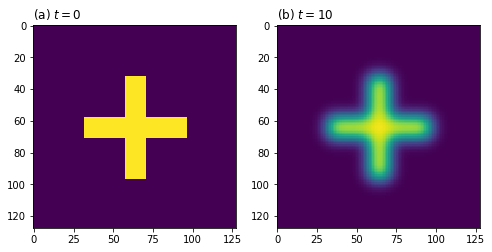

In [13]:
from matplotlib.colors import Normalize
u0 = initial_state(128)
f, axs = plt.subplots(1, 2, figsize=(8, 4))
norm = Normalize(0, 1)
axs[0].imshow(u0, norm=norm)
axs[0].set_title("(a) $t = 0$", loc="left")
axs[1].imshow(u, norm=norm)
axs[1].set_title("(b) $t = 10$", loc="left")

## 3) Processes versus threads

Use the ``concurrent.futures`` module to execute the ``heavy_calculation`` function 10 times with ``n = 1_000_000`` concurrently. Compare and explain the performance of ``ThreadPoolExecutor`` and ``ProcessPoolExecutor``.

**Hint:** For compute-limited tasks choosing the number of workers identical to the number of compute cores is generally a good idea. You can use ``os.cpu_count`` to determine the number of cores on your computer.

In [15]:
import math

def heavy_calculation(n):
    result = 0
    for i in range(n):
        result += math.sqrt(n)
    return result

In [16]:
import os
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
n = 1_000_000

def run_heavy_calculations_threads():
    executor = ThreadPoolExecutor(max_workers=os.cpu_count())
    results = [executor.submit(heavy_calculation, n) for i in range(10)]
    return [result.result() for result in results]
    
def run_heavy_calculations_processes():
    executor = ProcessPoolExecutor(max_workers=os.cpu_count())
    results = [executor.submit(heavy_calculation, n) for i in range(10)]
    return [result.result() for result in results]

In [17]:
%time r = run_heavy_calculations_processes()

CPU times: user 15.4 ms, sys: 13.2 ms, total: 28.6 ms
Wall time: 875 ms


In [18]:
%time r = run_heavy_calculations_threads()

CPU times: user 1.63 s, sys: 3.4 ms, total: 1.63 s
Wall time: 1.73 s


## 4) Parallel heat equation using numba

Use the numba package to speed up the first version of the step function. Define a serial and a parallel version. Compare the performance of the serial version to the parallel version for different grid sizes. How large does the grid have to be for the parallel version to be faster?

In [ ]:
def solve_heat_equation_numba(size, n_steps):
    u = initial_state(size) 
    for i in range(n_steps):
        u = step_serial(u)
    return u

def solve_heat_equation_numba_parallel(size, n_steps):
    u = initial_state(size) 
    for i in range(n_steps):
        u = step_parallel(u)
    return u

In [ ]:
def step_serial(u):
    """
    Perform a solver step of the heat equation.
    
    Args:
        u: n x n numpy.ndarray containing the heat distribution at time t.
        
    Return:
        n x n numpy.ndarray containing the heat distribution at time t + 0.1.
    
    """
    pass

In [ ]:
def step_parallel(u):
    """
    Perform a solver step of the heat equation.
    
    Args:
        u: n x n numpy.ndarray containing the heat distribution at time t.
        
    Return:
        n x n numpy.ndarray containing the heat distribution at time t + 0.1.
    
    """
    pass

In [ ]:
%timeit u = solve_heat_equation_numba(128, 100)

In [ ]:
%timeit u = solve_heat_equation_numba_parallel(128, 100)

In [ ]:
%timeit u = solve_heat_equation_numba(2048, 100)

In [ ]:
%timeit u = solve_heat_equation_numba_parallel(2048, 100)